<a href="https://colab.research.google.com/github/Aleena24/ML_Lab/blob/main/lab7_2348503.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import os

In [ ]:
df = pd.read_csv('/content/employee_data.csv')
df.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0


Data Exploration and Visualization:

EDA exploratory data analysis

In [ ]:
#Basic information
df.info()

#Describe the data
df.describe()

#Find the duplicates
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14249 entries, 0 to 14248
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14249 non-null  int64  
 1   department         13540 non-null  object 
 2   filed_complaint    2058 non-null   float64
 3   last_evaluation    12717 non-null  float64
 4   n_projects         14249 non-null  int64  
 5   recently_promoted  300 non-null    float64
 6   salary             14249 non-null  object 
 7   satisfaction       14068 non-null  float64
 8   status             14249 non-null  object 
 9   tenure             14068 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.1+ MB


28

In [ ]:
#unique values
df['tenure'].unique()

array([ 5.,  2.,  3.,  4.,  7.,  6., nan, 10.,  8.])

distribution of employee tenure using a histogram.

Text(0, 0.5, 'No. of Employees')

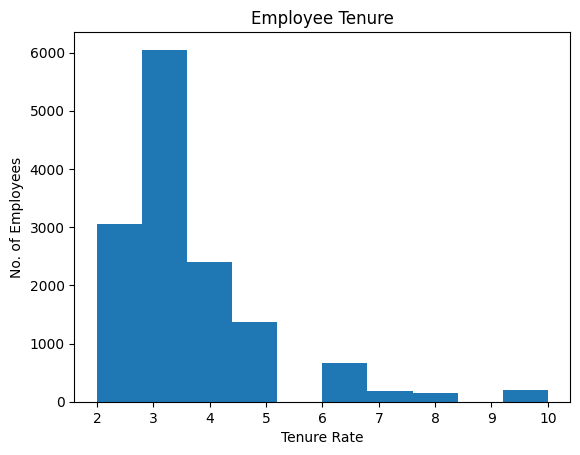

In [ ]:
df['tenure'].plot(kind='hist')
plt.title('Employee Tenure')
plt.xlabel('Tenure Rate')
plt.ylabel('No. of Employees')

In [ ]:
# Create a new column to indicate whether the employee left the company
df['status'] = df['satisfaction'] == 1

# Create a boxplot of job satisfaction scores by whether the employee left the company
sns.boxplot(
    x = 'status',
    y = 'satisfaction',
    showmeans=True,
    data=df
)
# Rotate x labels to prevent overlapping
sns.set(xticklabels=sns.despine(bottom=True).get_xticklabels(), rotation=45)

# Display the plot
plt.show()


pie chart to show the distribution of attrition

In [ ]:
Left = df['status'].value_counts()
Employed = df['status'].value_counts()

pct_left = Left / (Left + Employed) * 100
pct_employed = Employed / (Left + Employed) * 100

# Create a one-dimensional array of the percentages
x = [pct_left, pct_employed]


plt.figure(figsize=(10, 10))
plt.pie(x, labels=['Left', 'Employed'], autopct='%1.1f%%')
plt.title('Attrition Distribution')
plt.show()


scatter plot

In [ ]:
# Load the data from a file
df = np.loadtxt('employee_data.csv', delimiter=',')

# Split the data into x and y arrays
x = data[:, 0]  # Employee satisfaction scores
y = data[:, 1]  # Last evaluation scores


# Create a scatter plot with the x and y arrays
plt.scatter(x, y, c='blue')

# Add labels and a title to the plot
plt.xlabel('Employee satisfaction score')
plt.ylabel('Last evaluation score')
plt.title('Scatter plot of employee satisfaction scores vs last evaluation scores')

# Add a legend to the plot
plt.legend(['Employees'], loc='upper left')

# Display the plot
plt.show()

Decision tree

In [ ]:
# Drop the missing values
df = df.dropna()

In [ ]:
# Select the features to use for training the model
features = ['tenure', 'satisfaction', 'n_projects']

# Create a NumPy array of the features
X = df[features].to_numpy()

# Create a NumPy array of the labels
y = df['status'].to_numpy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Create the decision tree classifier
model = DecisionTreeClassifier()


In [ ]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer object
imputer = SimpleImputer(strategy='mean')

# Impute the missing values in the training data
X_train = imputer.fit_transform(X_train)

# Train the decision tree classifier on the imputed training data
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Evaluate the model on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = np.mean(y_pred == y_test)

# Print the accuracy of the model
print('Accuracy:', accuracy)

In [ ]:
# Create a NumPy array of the features for new employees
new_employee_features = np.array([[1, 4, 3]])

# Predict employee attrition for new employees
new_employee_predictions = model.predict(new_employee_features)

# Print the employee attrition predictions
print('Employee attrition predictions:', new_employee_predictions)

Gini impurity

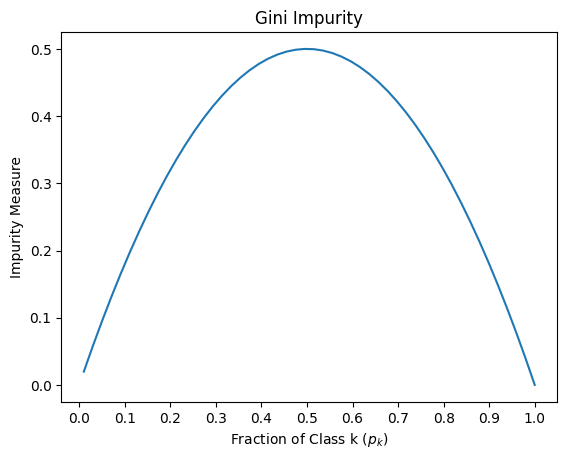

In [42]:
#A figure is created to show Gini ımpurity measures
plt.figure()
x = np.linspace(0.01,1)
y = 1 - (x*x) - (1-x)*(1-x)
plt.plot(x,y)
plt.title('Gini Impurity')
plt.xlabel("Fraction of Class k ($p_k$)")
plt.ylabel("Impurity Measure")
plt.xticks(np.arange(0,1.1,0.1))

plt.show()